### Importación de datos



In [34]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

store = pd.read_csv(url)
store2 = pd.read_csv(url2)
store3 = pd.read_csv(url3)
store4 = pd.read_csv(url4)

store.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [35]:
total_store1 = store['Precio'].sum()
print(f"Total de ventas tienda 1: {total_store1}")
total_store2 = store2['Precio'].sum()
print(f"Total de ventas tienda 2: {total_store2}")
total_store3 = store3['Precio'].sum()
print(f"Total de ventas tienda 3: {total_store3}")
total_store4 = store4['Precio'].sum()
print(f"Total de ventas tienda 4: {total_store4}")

Total de ventas tienda 1: 1150880400.0
Total de ventas tienda 2: 1116343500.0
Total de ventas tienda 3: 1098019600.0
Total de ventas tienda 4: 1038375700.0


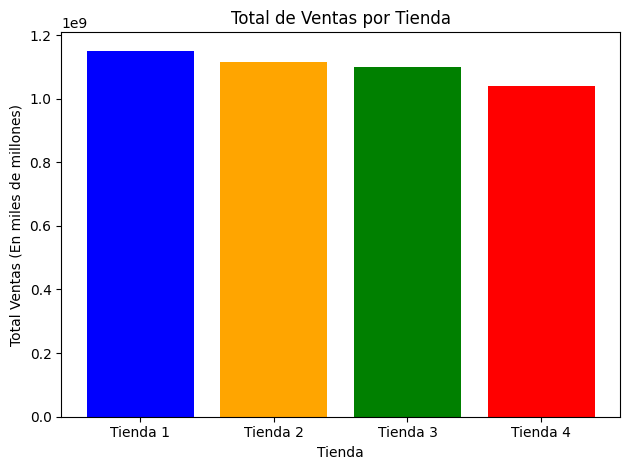

In [54]:
import matplotlib.pyplot as plt

plt.bar(['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
        [total_store1, total_store2, total_store3, total_store4],
        color=['blue', 'orange', 'green', 'red'])
plt.title('Total de Ventas por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Total Ventas (En miles de millones)')
plt.tight_layout()
plt.show()

# 2. Ventas por categoría

In [45]:
sales_by_category = store.groupby('Categoría del Producto').size().reset_index(name='Ventas').sort_values(by='Ventas', ascending=False)
sales_by_category2 = store2.groupby('Categoría del Producto').size().reset_index(name='Ventas').sort_values(by='Ventas', ascending=False)
sales_by_category3 = store3.groupby('Categoría del Producto').size().reset_index(name='Ventas').sort_values(by='Ventas', ascending=False)
sales_by_category4 = store4.groupby('Categoría del Producto').size().reset_index(name='Ventas').sort_values(by='Ventas', ascending=False)
sales_by_category

,Categoría del Producto,Ventas
7,Muebles,465
3,Electrónicos,448
5,Juguetes,324
2,Electrodomésticos,312
1,Deportes y diversión,284
4,Instrumentos musicales,182
6,Libros,173
0,Artículos para el hogar,171


# 3. Calificación promedio de la tienda


In [36]:
store_mean = store['Calificación'].mean()
store2_mean = store2['Calificación'].mean()
store3_mean = store3['Calificación'].mean()
store4_mean = store4['Calificación'].mean()
print(f"Calificación promedio tienda 1: {round(store_mean, 2)} estrellas")
print(f"Calificación promedio tienda 2: {round(store2_mean, 2)} estrellas")
print(f"Calificación promedio tienda 3: {round(store3_mean, 2)} estrellas")
print(f"Calificación promedio tienda 4: {round(store4_mean, 2)} estrellas")

Calificación promedio tienda 1: 3.98 estrellas
Calificación promedio tienda 2: 4.04 estrellas
Calificación promedio tienda 3: 4.05 estrellas
Calificación promedio tienda 4: 4.0 estrellas


# 4. Productos más y menos vendidos

In [48]:
sales_by_products = store.groupby('Producto').size().reset_index(name='Ventas').sort_values(by='Ventas', ascending=False)
sales_by_products2 = store2.groupby('Producto').size().reset_index(name='Ventas').sort_values(by='Ventas', ascending=False)
sales_by_products3 = store3.groupby('Producto').size().reset_index(name='Ventas').sort_values(by='Ventas', ascending=False)
sales_by_products4 = store4.groupby('Producto').size().reset_index(name='Ventas').sort_values(by='Ventas', ascending=False)
sales_by_products.head(10)

,Producto,Ventas
48,TV LED UHD 4K,60
33,Microondas,60
1,Armario,60
40,Secadora de ropa,58
9,Bloques de construcción,56
32,Mesa de noche,56
5,Balón de baloncesto,55
50,Vaso térmico,54
23,Impresora,54
39,Refrigerador,54


# 5. Envío promedio por tienda

In [37]:
delivery_cost_store1 = store['Costo de envío'].mean()
delivery_cost_store2 = store2['Costo de envío'].mean()
delivery_cost_store3 = store3['Costo de envío'].mean()
delivery_cost_store4 = store4['Costo de envío'].mean()
print(f"Costo de envío promedio tienda 1: S/. {round(delivery_cost_store1, 2)}")
print(f"Costo de envío promedio tienda 2: S/. {round(delivery_cost_store2, 2)}")
print(f"Costo de envío promedio tienda 3: S/. {round(delivery_cost_store3, 2)}")
print(f"Costo de envío promedio tienda 4: S/. {round(delivery_cost_store4, 2)}")

Costo de envío promedio tienda 1: S/. 26018.61
Costo de envío promedio tienda 2: S/. 25216.24
Costo de envío promedio tienda 3: S/. 24805.68
Costo de envío promedio tienda 4: S/. 23459.46
